In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas
import json
from config import geoapify_key

In [34]:
college_info = pd.read_csv('../data/Kmeans_assignment_data.csv')
college_salary = pd.read_csv('../data/College_Salaries.csv')

college_df = pd.merge(college_info,college_salary,how='inner',)
college_df = {'School Name': college_df['School Name'],
              'Private': college_df['Private'],
              'Apps': college_df['Apps'],
              'Accept': college_df['Accept'],
              'Tuition/Semester': college_df['Outstate'],
              'Personal Spending/Semester': college_df['Personal'],
              'Book Costs/Semester': college_df['Books'],
              'Room & Board/Semester': college_df['Room.Board'],
              'Early Career Pay': college_df['Early Career Pay'],
              'Mid-Career Pay': college_df['Mid-Career Pay'],
              '% STEM Degrees': college_df['% STEM Degrees'],
              '% Grad rate': college_df['Grad.Rate'] }
college_final_df = pd.DataFrame(college_df)
college_final_df['Total Cost/Semester'] = college_final_df[['Personal Spending/Semester', 'Tuition/Semester', 'Book Costs/Semester', 'Room & Board/Semester']].sum(axis=1)
college_final_df['Acceptance Rate'] = college_final_df['Accept'] / college_final_df['Apps']

college_final_df['Early Career Pay'] = college_final_df['Early Career Pay'].str.replace('$', '').str.replace(',','').astype(int)
college_final_df['Mid-Career Pay'] = college_final_df['Mid-Career Pay'].str.replace('$', '').str.replace(',','').astype(int)
college_final_df['% STEM Degrees'] = college_final_df['% STEM Degrees'].str.replace('%', '').astype(int)
college_final_df['Early Career Pay / Cost'] = college_final_df['Early Career Pay'] / college_final_df['Total Cost/Semester']
college_final_df['Mid-Career Pay / Cost'] = college_final_df['Mid-Career Pay'] / college_final_df['Total Cost/Semester']
college_final_df['Expected Early Career Pay / cost'] = ((college_final_df['Early Career Pay']*(college_final_df['% Grad rate']*0.01))+(40000*(1-(college_final_df['% Grad rate']*0.01))))/college_final_df['Total Cost/Semester']
college_final_df['Expected Mid-Career Pay / cost'] = ((college_final_df['Mid-Career Pay']*(college_final_df['% Grad rate']*0.01))+(40000*(1-(college_final_df['% Grad rate']*0.01))))/college_final_df['Total Cost/Semester']

college_final_df

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Early Career Pay / Cost,Mid-Career Pay / Cost,Expected Early Career Pay / cost,Expected Mid-Career Pay / cost
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500,110800,7,60,13390,0.742169,4.592980,8.274832,3.950709,6.159821
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500,108000,8,56,20980,0.880146,3.074357,5.147760,2.560534,3.721640
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400,89200,11,54,16565,0.768207,3.163296,5.384848,2.818956,4.018593
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300,99400,20,59,19735,0.836930,2.954142,5.036737,2.573955,3.802686
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700,102000,1,15,13980,0.756477,4.270386,7.296137,3.072604,3.526466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Worcester Polytechnic Institute,Yes,2768,2314,15884,730,530,5370,89100,161000,86,82,22514,0.835983,3.957538,7.151106,3.564982,6.183708
449,Xavier University,Yes,1959,1805,11520,1250,600,4960,64400,112900,5,83,18330,0.921388,3.513366,6.159302,3.287070,5.483197
450,Xavier University of Louisiana,Yes,2097,1915,6900,781,617,4200,54200,102200,33,49,12498,0.913209,4.336694,8.177308,3.757241,5.639142
451,Yale University,Yes,10705,2453,19840,2115,630,6510,89700,168300,27,99,29095,0.229145,3.083004,5.784499,3.065922,5.740402


In [35]:
college_final_df.to_csv('../data/college_clean.csv',index=False, header=True)

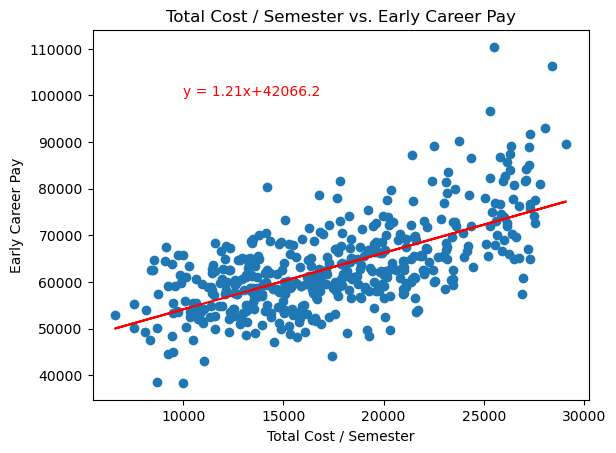

In [6]:
plt.scatter(college_final_df['Total Cost/Semester'], college_final_df['Early Career Pay'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(college_final_df['Total Cost/Semester'],college_final_df['Early Career Pay'])
regression_line = college_final_df['Total Cost/Semester']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.plot(college_final_df['Total Cost/Semester'],regression_line, color='red')
plt.annotate(line, (10000,100000),color='red')
plt.xlabel('Total Cost / Semester')
plt.ylabel('Early Career Pay')
plt.title('Total Cost / Semester vs. Early Career Pay')
plt.savefig('../data/total_cost_vs_early_career_pay')

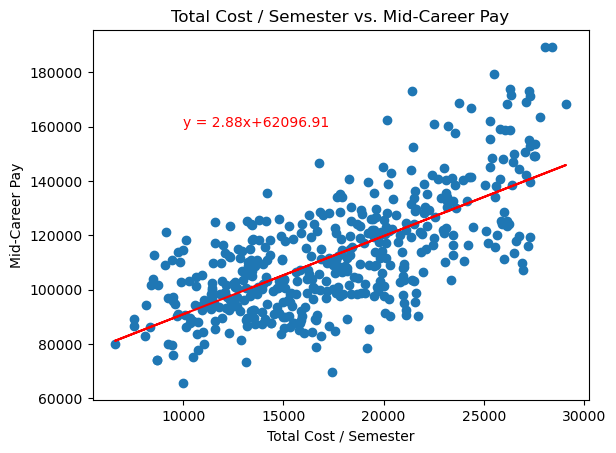

In [7]:
plt.scatter(college_final_df['Total Cost/Semester'], college_final_df['Mid-Career Pay'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(college_final_df['Total Cost/Semester'],college_final_df['Mid-Career Pay'])
regression_line = college_final_df['Total Cost/Semester']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.plot(college_final_df['Total Cost/Semester'],regression_line, color='red')
plt.annotate(line, (10000,160000),color='red')
plt.xlabel('Total Cost / Semester')
plt.ylabel('Mid-Career Pay')
plt.title('Total Cost / Semester vs. Mid-Career Pay')
plt.savefig('../data/total_cost_vs_mid_career_pay')

In [37]:
college_final_df["Lat"] = ""
college_final_df["Lon"] = ""
base_url = "https://api.geoapify.com/v1/geocode/search"
params = {"apiKey":geoapify_key,
          "format":"json",
          'country':'United States of America'}

In [39]:
print("Starting Coordinate Search by College Name")
for index, row in college_final_df.iterrows():
    school_name = college_final_df.loc[index, "School Name"]
    params["text"] = f'{school_name}'
    response = requests.get(base_url, params=params)
    response = response.json()
    try:
        college_final_df.loc[index, "Lat"] = response["results"][0]["lat"]
        college_final_df.loc[index, "Lon"] = response["results"][0]["lon"]
    except (KeyError, IndexError):
        college_final_df.loc[index, "Lat"] = "Not Found"
        college_final_df.loc[index, "Lon"] = "Not Found"

    print(f'Coordinates for {school_name} found...')

college_final_df.head()

Starting Coordinate Search by College Name
Coordinates for Abilene Christian University found...
Coordinates for Adelphi University found...
Coordinates for Adrian College found...
Coordinates for Agnes Scott College found...
Coordinates for Alaska Pacific University found...
Coordinates for Albertus Magnus College found...
Coordinates for Albion College found...
Coordinates for Albright College found...
Coordinates for Alfred University found...
Coordinates for Allegheny College found...
Coordinates for Alma College found...
Coordinates for Alverno College found...
Coordinates for American International College found...
Coordinates for Amherst College found...
Coordinates for Andrews University found...
Coordinates for Angelo State University found...
Coordinates for Antioch University found...
Coordinates for Appalachian State University found...
Coordinates for Aquinas College found...
Coordinates for Arkansas Tech University found...
Coordinates for Augustana College found...
Coord

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Early Career Pay / Cost,Mid-Career Pay / Cost,Expected Early Career Pay / cost,Expected Mid-Career Pay / cost,Lat,Lon
0,Abilene Christian University,Yes,1660,1232,7440,2200,450,3300,61500,110800,7,60,13390,0.742169,4.592980,8.274832,3.950709,6.159821,32.479488,-99.709501
1,Adelphi University,Yes,2186,1924,12280,1500,750,6450,64500,108000,8,56,20980,0.880146,3.074357,5.147760,2.560534,3.721640,40.74389,-73.98611
2,Adrian College,Yes,1428,1097,11250,1165,400,3750,52400,89200,11,54,16565,0.768207,3.163296,5.384848,2.818956,4.018593,41.898495,-84.060832
3,Agnes Scott College,Yes,417,349,12960,875,450,5450,58300,99400,20,59,19735,0.836930,2.954142,5.036737,2.573955,3.802686,33.768885,-84.294445
4,Alaska Pacific University,Yes,193,146,7560,1500,800,4120,59700,102000,1,15,13980,0.756477,4.270386,7.296137,3.072604,3.526466,45.506281,-122.593385


In [46]:
%%capture --no-display
colleges_map = college_final_df.hvplot.points("Lon",
                                              "Lat",
                                              geo = True,
                                              tiles = 'OSM',
                                              frame_width = 1000,
                                              frame_height = 800,
                                              size = "Expected Early Career Pay / cost",
                                              scale = 3,
                                              color = "Private",
                                              hover_cols = ["School Name","Total Cost/Semester","Grad Rate","Mid-Career Pay"])
                                              
colleges_map
#hvplot.save(colleges_map,'../data/map3.html')git 

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Private,Expected Early Career Pay / cost,School Name,Total Cost/Semester,Mid-Career Pay)

In [16]:
colleges_map = college_final_df.hvplot.points("Lon",
                                              "Lat",
                                              geo = True,
                                              tiles = 'OSM',
                                              frame_width = 1000,
                                              frame_height = 800,
                                              size = "Mid-Career Pay",
                                              scale = 0.02,
                                              color = "Private",
                                              hover_cols = ["School Name","Total Cost/Semester","Grad Rate","Early Career Pay"])
                                              
colleges_map
hvplot.save(colleges_map,'../data/map4.html')

In [26]:
college_final_df['Early Career Pay'].min()

38400.0

In [30]:
college_final_df.nlargest(10, 'Expected Early Career Pay / cost')

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Early Career Pay / Cost,Mid-Career Pay / Cost,Expected Early Career Pay / cost,Expected Mid-Career Pay / cost
142,Grove City College,Yes,2491,1110,5224,350,525,3048,67600.0,121200.0,27,100,9147,0.445604,7.390401,13.250246,7.390401,13.250246
269,Peru State College,No,701,501,2580,900,500,2624,52900.0,80100.0,4,44,6604,0.714693,8.010297,12.129013,6.916414,8.728649
312,South Dakota State University,No,2807,2589,3811,1970,500,2190,62500.0,104000.0,19,67,8471,0.922337,7.378114,12.277181,6.501594,9.783969
443,Winona State University,No,3325,2047,4200,1200,300,2700,62500.0,101600.0,12,58,8400,0.615639,7.440476,12.095238,6.315476,9.015238
19,Arkansas Tech University,No,1734,1729,3460,1000,450,2650,55400.0,89000.0,8,48,7560,0.997116,7.328042,11.772487,6.268783,8.402116
452,York College of Pennsylvania,Yes,2989,1855,4990,1250,500,3560,63500.0,103100.0,19,99,10300,0.620609,6.165049,10.009709,6.142233,9.948447
422,Wayne State College,No,1373,1373,2700,1660,540,2660,50100.0,86500.0,10,52,7560,1.000000,6.626984,11.441799,5.985714,8.489418
199,Louisiana Tech University,No,2397,2144,3957,1656,618,2325,64700.0,112800.0,26,45,8556,0.894451,7.561945,13.183731,5.974170,8.503974
291,Saint Cloud State University,No,3971,3306,4259,1884,350,2625,64600.0,109000.0,20,58,9118,0.832536,7.084887,11.954376,5.951744,8.776047
392,University of Southern Mississippi,No,2850,2044,4652,500,500,2470,54000.0,94300.0,10,45,8122,0.717193,6.648609,11.610441,5.700566,7.933391


In [31]:
college_final_df.nlargest(10, 'Expected Mid-Career Pay / cost')

,School Name,Private,Apps,Accept,Tuition/Semester,Personal Spending/Semester,Book Costs/Semester,Room & Board/Semester,Early Career Pay,Mid-Career Pay,% STEM Degrees,% Grad rate,Total Cost/Semester,Acceptance Rate,Early Career Pay / Cost,Mid-Career Pay / Cost,Expected Early Career Pay / cost,Expected Mid-Career Pay / cost
142,Grove City College,Yes,2491,1110,5224,350,525,3048,67600.0,121200.0,27,100,9147,0.445604,7.390401,13.250246,7.390401,13.250246
452,York College of Pennsylvania,Yes,2989,1855,4990,1250,500,3560,63500.0,103100.0,19,99,10300,0.620609,6.165049,10.009709,6.142233,9.948447
312,South Dakota State University,No,2807,2589,3811,1970,500,2190,62500.0,104000.0,19,67,8471,0.922337,7.378114,12.277181,6.501594,9.783969
443,Winona State University,No,3325,2047,4200,1200,300,2700,62500.0,101600.0,12,58,8400,0.615639,7.440476,12.095238,6.315476,9.015238
170,James Madison University,No,11223,5285,7994,732,500,4544,70000.0,125700.0,14,98,13770,0.470908,5.083515,9.128540,5.039942,9.004067
291,Saint Cloud State University,No,3971,3306,4259,1884,350,2625,64600.0,109000.0,20,58,9118,0.832536,7.084887,11.954376,5.951744,8.776047
269,Peru State College,No,701,501,2580,900,500,2624,52900.0,80100.0,4,44,6604,0.714693,8.010297,12.129013,6.916414,8.728649
199,Louisiana Tech University,No,2397,2144,3957,1656,618,2325,64700.0,112800.0,26,45,8556,0.894451,7.561945,13.183731,5.974170,8.503974
422,Wayne State College,No,1373,1373,2700,1660,540,2660,50100.0,86500.0,10,52,7560,1.000000,6.626984,11.441799,5.985714,8.489418
232,Montclair State University,No,5220,2128,3648,950,700,4834,61100.0,118400.0,9,58,10132,0.407663,6.030399,11.685748,5.155744,8.435847
